#TASK3 APPLY LOGISTIC REGRESSION FOR COUNT VECTORIZER FEATURES FOR BOTH UNIGRAMS AND BIGRAMS

##IN TASK1 WE HAVE TAKEN THE ONE HOT ENCODING OF THE FEATURES AND TASK 2 WE HAVE TAKEN THE TOP 1000 WORDS BASED ON THEIR TFIDF VALUE.IN TASK3 WE ARE TAKIN THE FEATURES UNIGRAMS AND BIGRAMS CONSIDERING THE COUNT VECTORIZER VALUES.WE WILL APPLY THE LOGISTIC REGRESSION WITH SGD CLASSIFIER WITH LOG LOSS . WE WILL OBTAIN THE PERFORMANCE OF THE MODEL

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('personalcancerassignmentdata.csv')  


In [0]:
datanew=pd.read_csv('personalcancerassignmentdata.csv')

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
datanew.head(5)

,Unnamed: 0,ID,Gene,Variation,Class,TEXT,genevariation
0,0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,FAM58A Truncating_Mutations
1,1,1,CBL,W802*,2,abstract background non small cell lung cancer...,CBL W802*
2,2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,CBL Q249E
3,3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D
4,4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,CBL L399V


In [0]:
import re
stop=set(stopwords.words('english'))
def preprocessing(text,index,column):
    if type(text) is not int:
        string=""
        text=re.sub('[^a-zA-Z0-9]',' ',text)
        text=re.sub('\s+',' ',text)
        text=text.lower()
        for word in text.split():
            if not word in stop:
                string=string+word+" "
        datanew[column][index]=string
        

In [0]:
import time
starttime=time.clock()
for index,row in datanew.iterrows():
    if type(row['TEXT']) is str:
        preprocessing(row['TEXT'],index,'TEXT')
print(time.clock()-starttime)

431.93433699999997


In [0]:
datanew['Variation']=datanew['Variation'].str.replace(' ','')

In [0]:
task1data=datanew
task1y=task1data['Class']
task1data=task1data[['TEXT','Variation','Gene']]

In [0]:
task1data.head(5)

,TEXT,Variation,Gene
0,cyclin dependent kinases cdks regulate variety...,Truncating_Mutations,FAM58A
1,abstract background non small cell lung cancer...,W802*,CBL
2,abstract background non small cell lung cancer...,Q249E,CBL
3,recent evidence demonstrated acquired uniparen...,N454D,CBL
4,oncogenic mutations monomeric casitas b lineag...,L399V,CBL


In [0]:
from sklearn.model_selection import train_test_split
tx,testx,ty,testy=train_test_split(task1data,task1y,test_size=0.2)
print(tx.shape)
print(ty.shape)
print(testx.shape)
print(testy.shape)

(2656, 3)
(2656,)
(665, 3)
(665,)


In [0]:
print(testx.shape)
print(testy.shape)

(665, 3)
(665,)


In [0]:
print(type(testy))

<class 'pandas.core.series.Series'>


In [0]:
trainx,cvx,trainy,cvy=train_test_split(tx,ty,test_size=0.2)
print(trainx.shape)
print(cvx.shape)
print(trainy.shape)
print(cvy.shape)

(2124, 3)
(532, 3)
(2124,)
(532,)


In [0]:
genevector=CountVectorizer()
traingenefeatureonehotencoding=genevector.fit_transform(trainx['Gene'])
testgenefeatureonehotencoding=genevector.transform(testx['Gene'])
cvgenefeatureonehotencoding=genevector.transform(cvx['Gene'])
print(traingenefeatureonehotencoding.shape)
print(testgenefeatureonehotencoding.shape)
print(cvgenefeatureonehotencoding.shape)

(2124, 225)
(665, 225)
(532, 225)


In [0]:
from sklearn.preprocessing import normalize
traingenefeatureonehotencoding=normalize(traingenefeatureonehotencoding)
testgenefeatureonehotencoding=normalize(testgenefeatureonehotencoding)
cvgenefeatureonehotencoding=normalize(cvgenefeatureonehotencoding)

In [0]:
variationvector=CountVectorizer()
trainvariationfeatureonehotencoding=variationvector.fit_transform(trainx['Variation'])
testvariationfeatureonehotencoding=variationvector.transform(testx['Variation'])
cvvariationfeatureonehotencoding=variationvector.transform(cvx['Variation'])
print(trainvariationfeatureonehotencoding.shape)
print(testvariationfeatureonehotencoding.shape)
print(cvvariationfeatureonehotencoding.shape)


(2124, 1973)
(665, 1973)
(532, 1973)


In [0]:
trainvariationfeatureonehotencoding=normalize(trainvariationfeatureonehotencoding)
testvariationfeatureonehotencoding=normalize(testvariationfeatureonehotencoding)
cvvariationfeatureonehotencoding=normalize(cvvariationfeatureonehotencoding)

In [0]:
textvector=CountVectorizer(min_df=5,ngram_range=(1,2))
traintextfeatureonehotencoding=textvector.fit_transform(trainx['TEXT'])
testtextfeatureonehotencoding=textvector.transform(testx['TEXT'])
cvtextfeatureonehotencoding=textvector.transform(cvx['TEXT'])
print(traintextfeatureonehotencoding.shape)
print(testtextfeatureonehotencoding.shape)
print(cvtextfeatureonehotencoding.shape)

(2124, 469064)
(665, 469064)
(532, 469064)


In [0]:
traintextfeatureonehotencoding=normalize(traintextfeatureonehotencoding)
testtextfeatureonehotencoding=normalize(testtextfeatureonehotencoding)
cvtextfeatureonehotencoding=normalize(cvtextfeatureonehotencoding)

In [0]:
from scipy.sparse import hstack
task1traindata=hstack((traingenefeatureonehotencoding,trainvariationfeatureonehotencoding,traintextfeatureonehotencoding)).tocsr()
task1testdata=hstack((testgenefeatureonehotencoding,testvariationfeatureonehotencoding,testtextfeatureonehotencoding)).tocsr()
task1cvdata=hstack((cvgenefeatureonehotencoding,cvvariationfeatureonehotencoding,cvtextfeatureonehotencoding)).tocsr()
print(task1traindata.shape)
print(task1testdata.shape)
print(task1cvdata.shape)

(2124, 471262)
(665, 471262)
(532, 471262)


In [0]:
print(trainy.shape)
print(cvy.shape)
print(testy.shape)

(2124,)
(532,)
(665,)


In [0]:
def predict_and_plot_confusion_matrix(train_x, trainy,test_x, test_y, clf):
    clf.fit(train_x, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, trainy)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

for alpha = 1e-06
Log Loss : 1.0613369824556358
for alpha = 1e-05
Log Loss : 0.9888660717503559
for alpha = 0.0001
Log Loss : 0.9178701045932761
for alpha = 0.001
Log Loss : 0.9636800827738916
for alpha = 0.01
Log Loss : 1.1339653087054247
for alpha = 0.1
Log Loss : 1.431197168266987
for alpha = 1
Log Loss : 1.5700688727802201
for alpha = 10
Log Loss : 1.588152735716225
for alpha = 100
Log Loss : 1.590188008271396


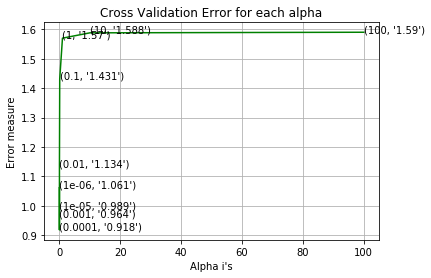

For values of best alpha =  0.0001 The train log loss is: 0.4251292117075758
For values of best alpha =  0.0001 The cross validation log loss is: 0.9178701045932761
For values of best alpha =  0.0001 The test log loss is: 1.047845767208287


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(task1traindata,trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task1traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task1cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task1traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task1traindata,trainy)

predict_y = sig_clf.predict_proba(task1traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9178701045932761
Number of mis-classified points : 0.3026315789473684
-------------------- Confusion matrix --------------------


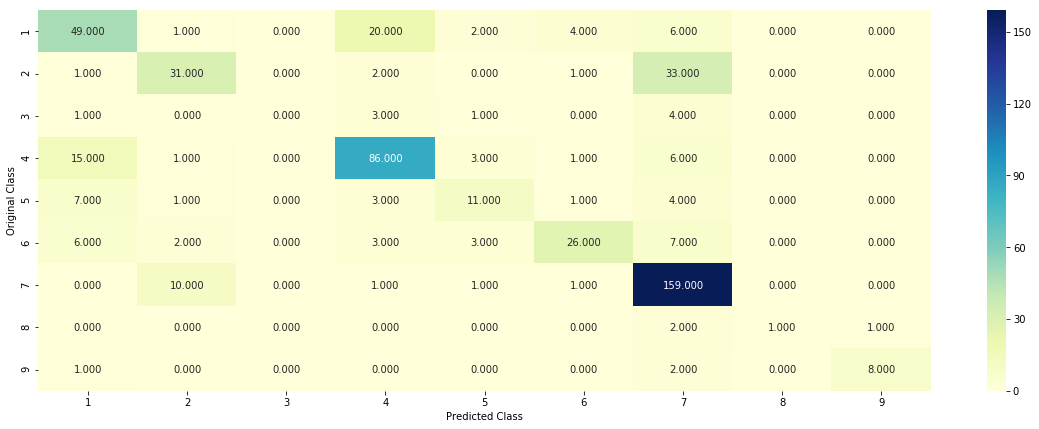

-------------------- Precision matrix (Columm Sum=1) --------------------


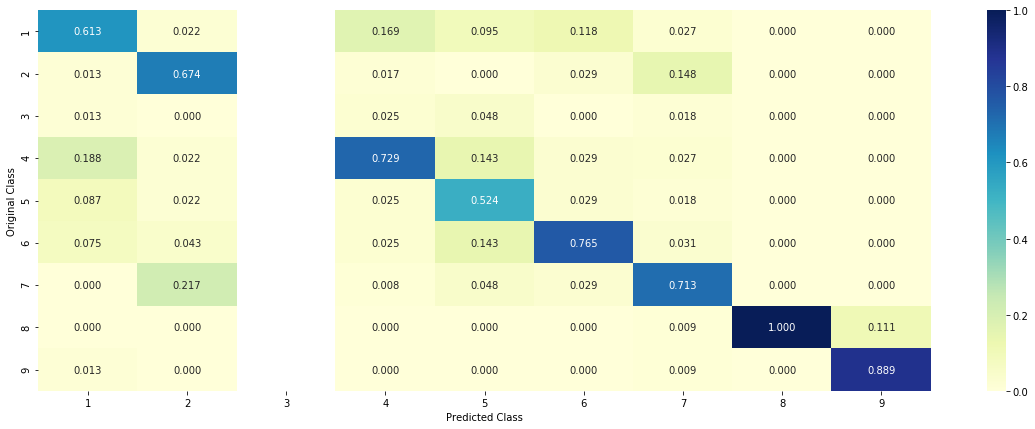

-------------------- Recall matrix (Row sum=1) --------------------


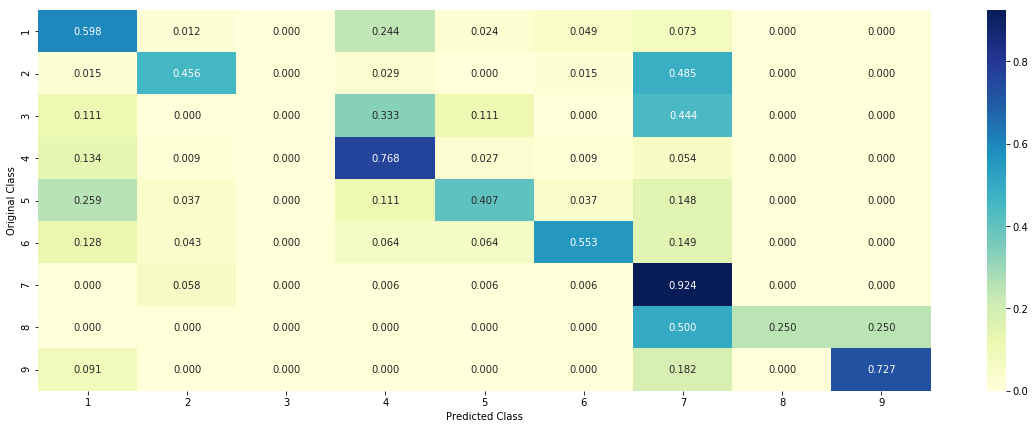

In [0]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(task1traindata, trainy,task1cvdata, cvy, clf)

In [0]:
testyy=np.array(testy)


In [0]:

def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=5,ngram_range=(1,2))
    
    gene_vec = gene_count_vec.fit(trainx['Gene'])
    var_vec  = var_count_vec.fit(trainx['Variation'])
    text_vec = text_count_vec.fit(trainx['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "TEXT feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [0]:
testyy[12]

7

In [0]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task1traindata,trainy)
test_point_index = 12
no_feature = 500
predicted_cls = clf.predict(task1testdata[12])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(clf.predict_proba(task1testdata[12]),4))
print("Actual Class :", testyy[12])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['TEXT'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.900e-03 8.900e-02 7.200e-03 5.100e-03 1.100e-02 7.700e-03 8.733e-01
  0.000e+00 8.000e-04]]
Actual Class : 7
--------------------------------------------------
0 TEXT feature [activation] present in test data point [True]
7 TEXT feature [egfr] present in test data point [True]
10 TEXT feature [cells] present in test data point [True]
12 TEXT feature [kit] present in test data point [True]
15 TEXT feature [flt3] present in test data point [True]
16 TEXT feature [fig] present in test data point [True]
25 TEXT feature [signaling] present in test data point [True]
42 TEXT feature [codon] present in test data point [True]
54 TEXT feature [lung] present in test data point [True]
65 TEXT feature [mutants] present in test data point [True]
78 TEXT feature [activating] present in test data point [True]
85 TEXT feature [akt] present in test data point [True]
96 TEXT feature [cysteine] present in test data point [True]
114 TEXT feature [ligan

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [0]:
test_point_index = 19
no_feature = 500
predicted_cls = clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['TEXT'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[1.640e-02 6.162e-01 1.100e-03 1.340e-02 1.020e-02 2.108e-01 1.316e-01
  0.000e+00 3.000e-04]]
Actual Class : 7
--------------------------------------------------
42 TEXT feature [genes] present in test data point [True]
77 TEXT feature [pik3ca] present in test data point [True]
121 TEXT feature [resistance] present in test data point [True]
126 TEXT feature [response] present in test data point [True]
127 TEXT feature [cfc] present in test data point [True]
167 TEXT feature [patients] present in test data point [True]
188 TEXT feature [samples] present in test data point [True]
192 TEXT feature [mutated] present in test data point [True]
201 TEXT feature [number] present in test data point [True]
208 TEXT feature [gene] present in test data point [True]
226 TEXT feature [clinical] present in test data point [True]
236 TEXT feature [oncogenic] present in test data point [True]
238 TEXT feature [group] present in test data point [True]

### WITH THE LOGISTIC REGRESSION WE OBTAINED THE MODEL PERFORMANCE AND WE PRINTED THE FEATURES OF CORRECTLY CLASSIFED AND INCORRECTLY CLASSIFIED POINTS WITH TEST CASES. WE OBTAINED THE FEATURES. THE PEROFRMANCE OF THE MODEL IS

In [0]:
import pandas as pd
dta=[]
dta = [['LOGISTIC REGRESSION','ALPHA=0.001',0.425,0.91,1.04]]
aa=pd.DataFrame(dta, columns=['model','BEST HYPER PARAMETER','TRAIN_LOG_LOSS','CROSS_VALIDATAION_LOGLOSS','TEST_LOG_LOSS'])

In [3]:
aa

,model,BEST HYPER PARAMETER,TRAIN_LOG_LOSS,CROSS_VALIDATAION_LOGLOSS,TEST_LOG_LOSS
0,LOGISTIC REGRESSION,ALPHA=0.001,0.425,0.91,1.04


### WE HAVE ACHIEVED THE LOG LOSS NEAR TO 1 WITH USING THE BOTH UNIGRAM AND BIGRAM FEATURES WHICH IS COMPARTATIVELY GOOD